In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns             
from timeit import default_timer as timer
import os
import random
import csv
import json
import itertools
import pprint
import gc
import re

# import featuretools for automated feature engineering

#Import sklearn helper metrics and transformations
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score

#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

#import library for hyperparameter optimization
from hyperopt import STATUS_OK
from hyperopt import hp, tpe, Trials, fmin
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.6.0


In [ ]:
pip install fast-ml


     |████████████████████████████████| 42 kB 325 kB/s 


In [ ]:
from fast_ml.feature_selection import get_duplicate_features

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
final=pd.read_csv("Final_train.csv")

# **EDA**

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**TARGET DISTRIBUTION**

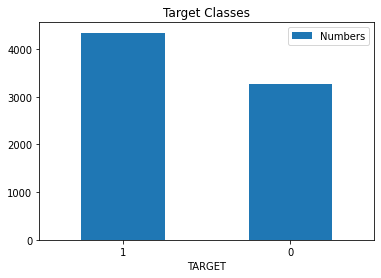

In [ ]:
df = pd.DataFrame({'TARGET':train.target.unique(), 'Numbers':train.target.value_counts()})
ax = df.plot.bar(x='TARGET', y='Numbers', rot=0)
plt.title("Target Classes")
plt.show()

We observe that:
- The class is unbalanced.
- Here 1 denotes disaster tweets and 0 represents non-disaster tweets
- As the class is unbalanced we will have to choose our metrics accordingly

**Missing Values**

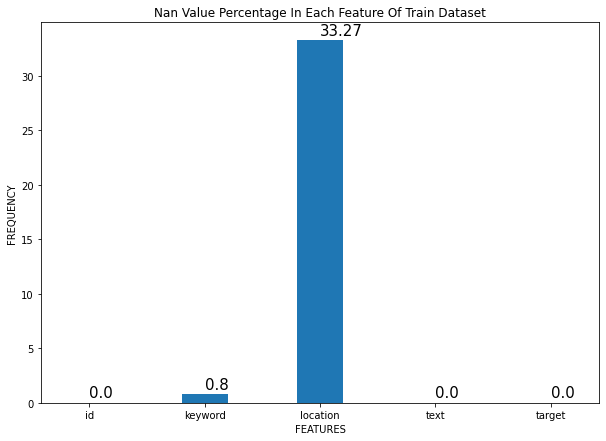

In [ ]:
z={}
for i in train.columns:
  z[i]=train[i].isnull().sum()/len(train.index)*100
fig, ax = plt.subplots(figsize = (10,7))
ax.bar(z.keys(), z.values(),width=0.4)
for index,data in enumerate(z.values()):
    plt.text(x=index , y =data+0.5 , s=str(round(data,2)) , fontdict=dict(fontsize=15))
plt.xlabel("FEATURES")
plt.ylabel("FREQUENCY")
plt.title("Nan Value Percentage In Each Feature Of Train Dataset")
plt.show()

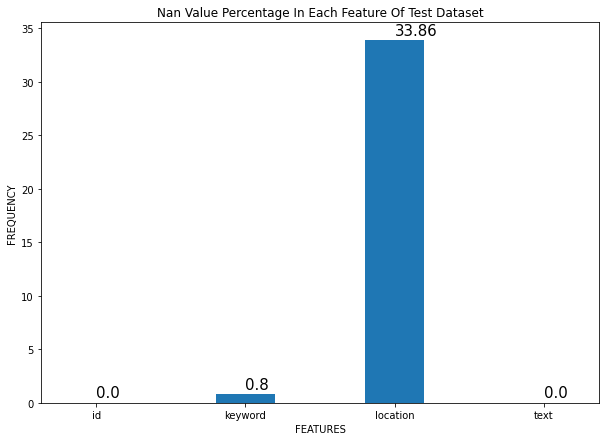

In [ ]:
z={}
for i in test.columns:
  z[i]=test[i].isnull().sum()/len(test.index)*100
fig, ax = plt.subplots(figsize = (10,7))
ax.bar(z.keys(), z.values(),width=0.4)
for index,data in enumerate(z.values()):
    plt.text(x=index , y =data+0.5 , s=str(round(data,2)) , fontdict=dict(fontsize=15))
plt.xlabel("FEATURES")
plt.ylabel("FREQUENCY")
plt.title("Nan Value Percentage In Each Feature Of Test Dataset")
plt.show()

Observation:
- We observe that the location feature has missing values for more than 2400 rows.
- Even though the location has many missing values it still could be valuable to use the feature so instead of removing the column we replace nan with None and same for Keyword Feature

**LOCATION**

In [ ]:
print(train["location"].value_counts().head(15))

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Chicago, IL         18
Australia           18
Name: location, dtype: int64


In [ ]:
df=train[train["location"]=="USA"]

temp=train[train["location"]=="New York"].replace({'location':{"New York":"USA"}})
df=pd.concat([df,temp])

temp=train[train["location"]=="United States"].replace({'location':{"United States":"USA"}})
df=pd.concat([df,temp])

temp=train[train["location"]=="London"].replace({'location':{"London":"UK"}})
df=pd.concat([df,temp])

temp=train[train["location"]=="Canada"]
df=pd.concat([df,temp])

temp=train[train["location"]=="Nigeria"]
df=pd.concat([df,temp])

temp=train[train["location"]=="UK"]
df=pd.concat([df,temp])

temp=train[train["location"]=="Los Angeles, CA"].replace({'location':{"Los Angeles, CA":"USA"}})
df=pd.concat([df,temp])

temp=train[train["location"]=="India"]
df=pd.concat([df,temp])

temp=train[train["location"]=="Mumbai"].replace({'location':{"Mumbai":"India"}})
df=pd.concat([df,temp])

temp=train[train["location"]=="Washington, DC"].replace({'location':{"Washington, DC":"USA"}})
df=pd.concat([df,temp])

temp=train[train["location"]=="Kenya"]
df=pd.concat([df,temp])

temp=train[train["location"]=="Worldwide"]
df=pd.concat([df,temp])

temp=train[train["location"]=="Chicago, IL"].replace({'location':{"Chicago, IL":"USA"}})
df=pd.concat([df,temp])

temp=train[train["location"]=="Australia"]
df=pd.concat([df,temp])

print(df["location"].unique())

['USA' 'UK' 'Canada' 'Nigeria' 'India' 'Kenya' 'Worldwide' 'Australia']


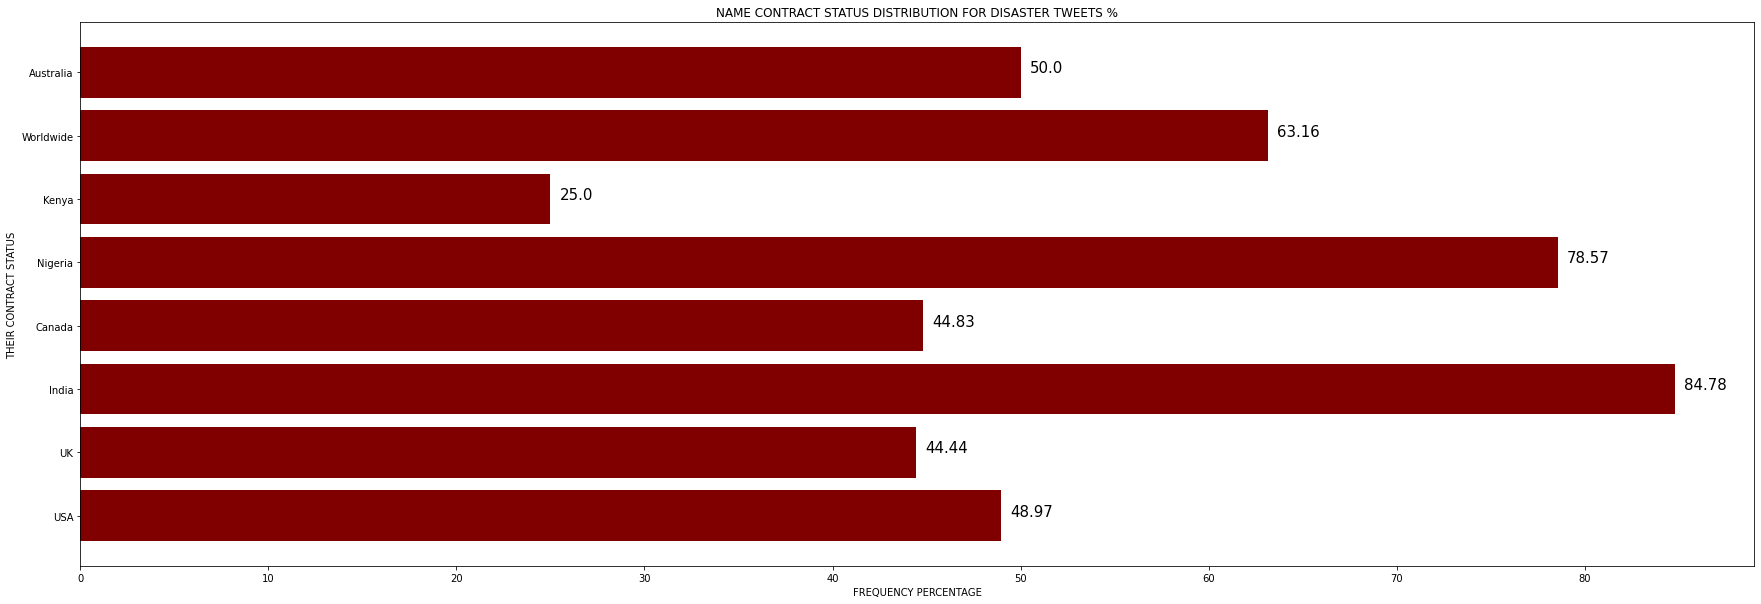

In [ ]:
name=df["location"].value_counts().index
val=[]
for i in name:
    temp=df[df['target']==1].location
    val.append(temp[temp==i].value_counts()*100/df[df["location"]==i].location.value_counts())
val=[i.values[0] for i in val]
fig = plt.figure(figsize = (30, 10))
plt.barh(name, val, color ='maroon')
plt.title("NAME CONTRACT STATUS DISTRIBUTION FOR DISASTER TWEETS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("THEIR CONTRACT STATUS")
for index,data in enumerate(val):
    plt.text(x=data+0.5 , y =index , s=str(round(data,2)) , fontdict=dict(fontsize=15))
plt.show()

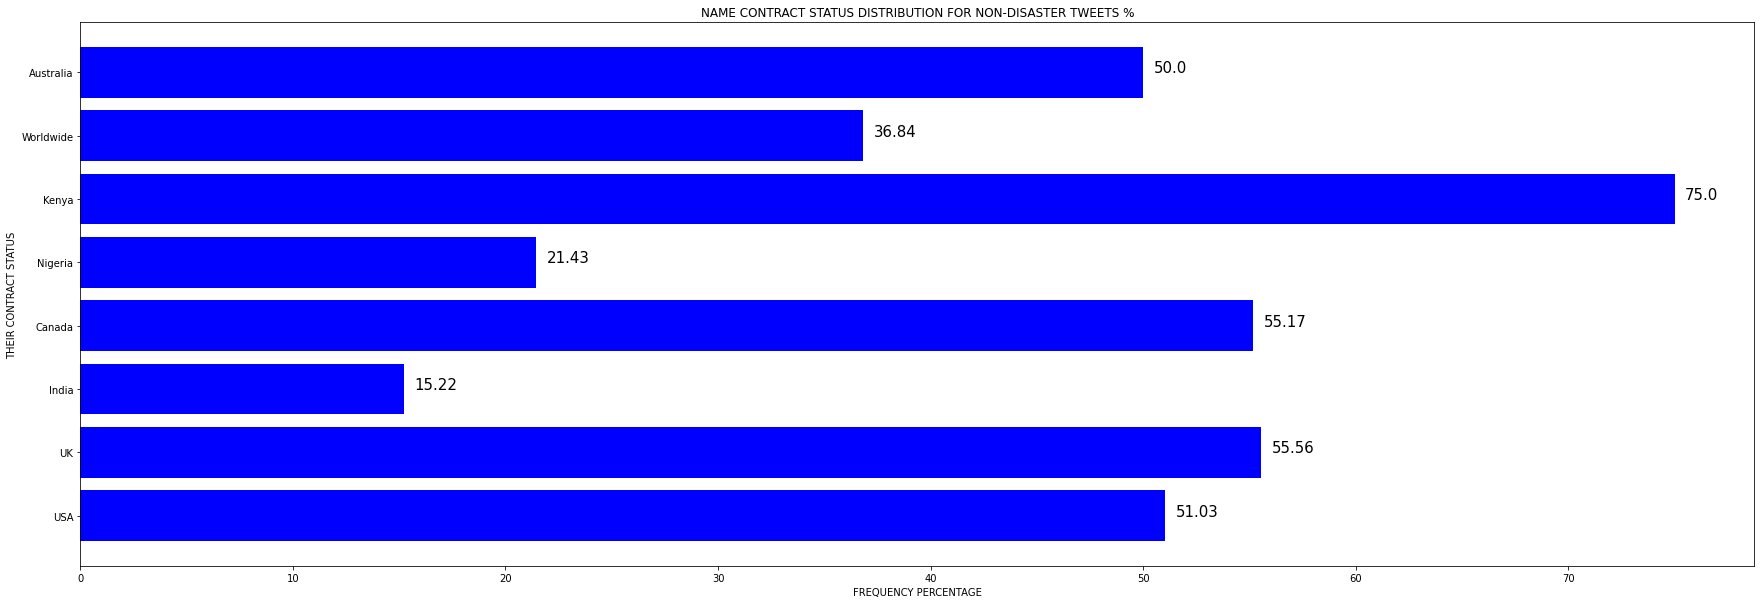

In [ ]:
name=df["location"].value_counts().index
val=[]
for i in name:
    temp=df[df['target']==0].location
    val.append(temp[temp==i].value_counts()*100/df[df["location"]==i].location.value_counts())
val=[i.values[0] for i in val]
fig = plt.figure(figsize = (30, 10))
plt.barh(name, val, color ='blue')
plt.title("NAME CONTRACT STATUS DISTRIBUTION FOR NON-DISASTER TWEETS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("THEIR CONTRACT STATUS")
for index,data in enumerate(val):
    plt.text(x=data+0.5 , y =index , s=str(round(data,2)) , fontdict=dict(fontsize=15))
plt.show()

Observation:
- We had seen that the location given in the dataset is mixed i.e., same are countires where as some are cities
- We took the top 15 locations with most tweets and converted them into their respective countries
- We see that India's percentage of disaster tweets are the most
- We see that Kenya's percentage of Non-disaster tweets are most

Length of Disaster tweets

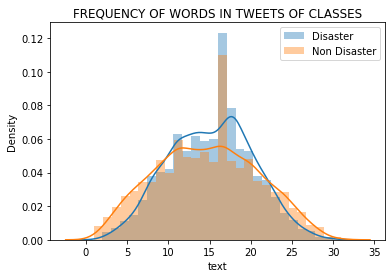

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
length_disaster=train[train["target"]==1].text.apply(lambda x: len(str(x).split()))
length_notdisaster=train[train["target"]==0].text.apply(lambda x: len(str(x).split()))

sns.distplot(length_disaster,label="Disaster")
sns.distplot(length_notdisaster,label="Non Disaster")
plt.legend()
plt.title("FREQUENCY OF WORDS IN TWEETS OF CLASSES")
plt.show()

Observation:
- We observe that the number of words in Disaster tweets are more compared to those of non-disaster tweets. Could be becuase it contains information about the situation.

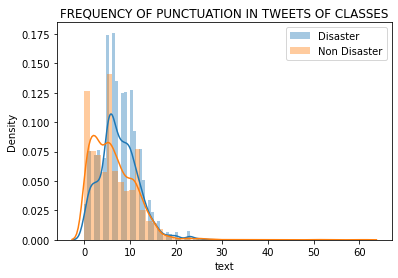

In [ ]:
import string
length_disaster= train[train["target"]==1].text.apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
length_notdisaster= train[train["target"]==0].text.apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

sns.distplot(length_disaster,label="Disaster")
sns.distplot(length_notdisaster,label="Non Disaster")
plt.legend()
plt.title("FREQUENCY OF PUNCTUATION IN TWEETS OF CLASSES")
plt.show()

Observation:
- The number of punctuations are also more in disaster tweets compared to Non disaster ones

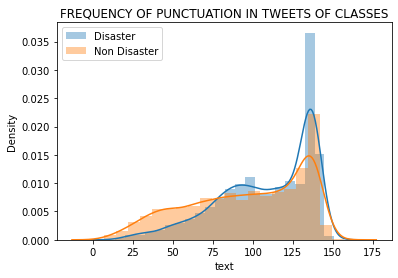

In [ ]:
import string
length_disaster=train[train["target"]==1].text.apply(lambda x: len(str(x)))
length_notdisaster=train[train["target"]==0].text.apply(lambda x: len(str(x)))

sns.distplot(length_disaster,label="Disaster")
sns.distplot(length_notdisaster,label="Non Disaster")
plt.legend()
plt.title("FREQUENCY OF PUNCTUATION IN TWEETS OF CLASSES")
plt.show()

Observation:
- As we had observed that the word count in disaster tweets are more thus so is the number of characters compared to the other class

**WORD CLOUD**

REFERENCE: https://www.geeksforgeeks.org/generating-word-cloud-python/

FOR TWEETS

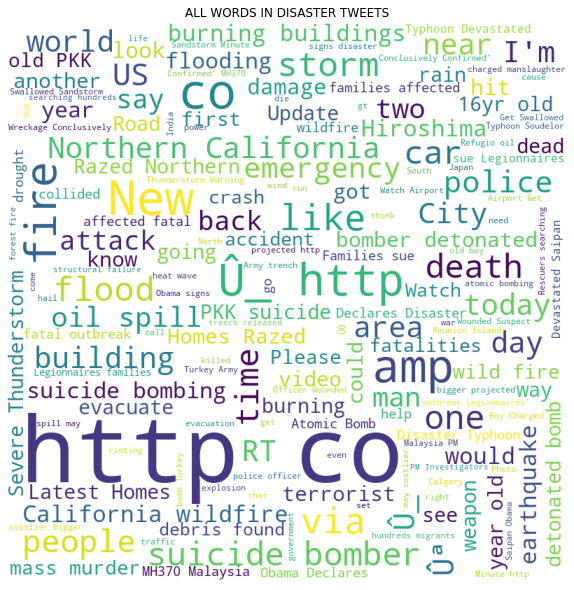

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
punctuation=set(string.punctuation)
stopwords|=punctuation
disaster_tweets=" ".join([i for i in train[train["target"]==1].text])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(disaster_tweets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("ALL WORDS IN DISASTER TWEETS")
plt.tight_layout(pad = 0)
 
plt.show()

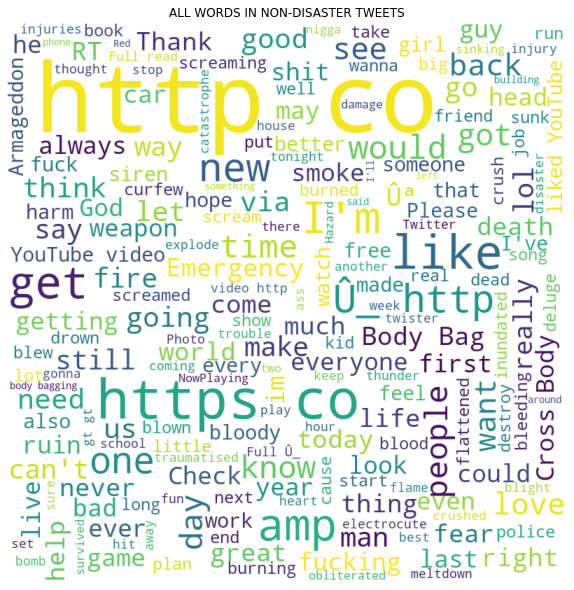

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
punctuation=set(string.punctuation)
stopwords|=punctuation
disaster_tweets=" ".join([i for i in train[train["target"]==0].text])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(disaster_tweets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("ALL WORDS IN NON-DISASTER TWEETS")
plt.tight_layout(pad = 0)
 
plt.show()

Observation:
It is observed that in DISASTER TWEETS words like suicide bombs,fire, attack, flood and many other catastrophic words are being used which cannot be seen in Non-Disaster tweets which makes sense

FOR KEYWORDS

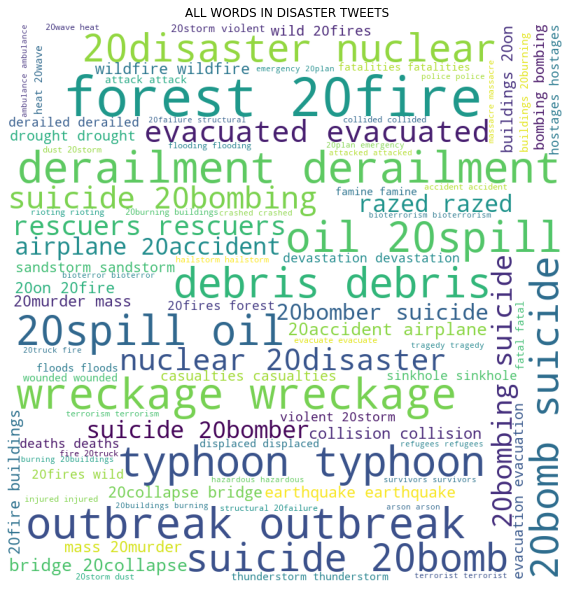

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
punctuation=set(string.punctuation)
stopwords|=punctuation
disaster_tweets=" ".join([i for i in train[train["target"]==1].keyword.dropna()])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(disaster_tweets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("ALL WORDS IN DISASTER TWEETS")
plt.tight_layout(pad = 0)
 
plt.show()

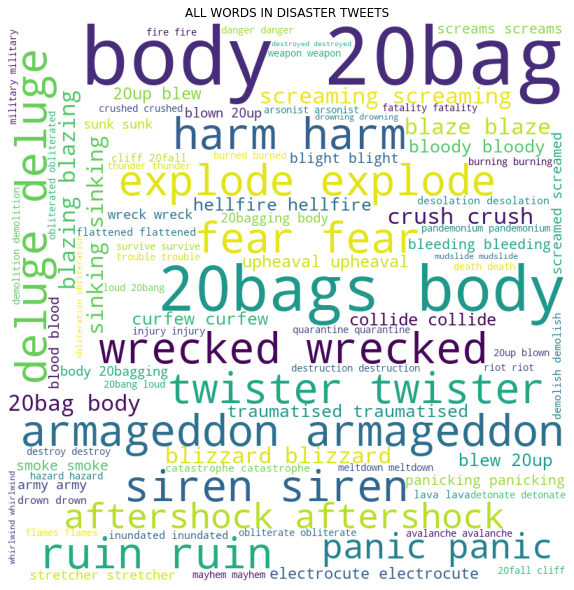

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
punctuation=set(string.punctuation)
stopwords|=punctuation
disaster_tweets=" ".join([i for i in train[train["target"]==0].keyword.dropna()])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(disaster_tweets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("ALL WORDS IN DISASTER TWEETS")
plt.tight_layout(pad = 0)
 
plt.show()

observation:
Similar observation to tweets we can see more catastrophic words being used in disaster tweets compared to the other class thus indicating the proper use of keywords

FOR LOCATION

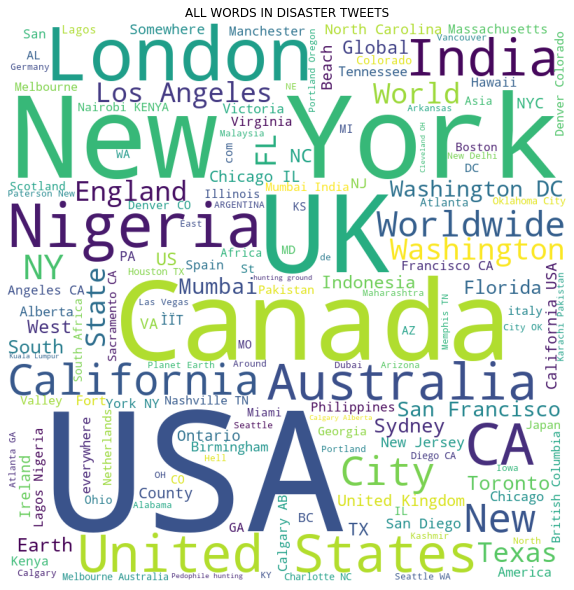

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
punctuation=set(string.punctuation)
stopwords|=punctuation
disaster_tweets=" ".join([i for i in train[train["target"]==1].location.dropna()])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(disaster_tweets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("ALL WORDS IN DISASTER TWEETS")
plt.tight_layout(pad = 0)
 
plt.show()

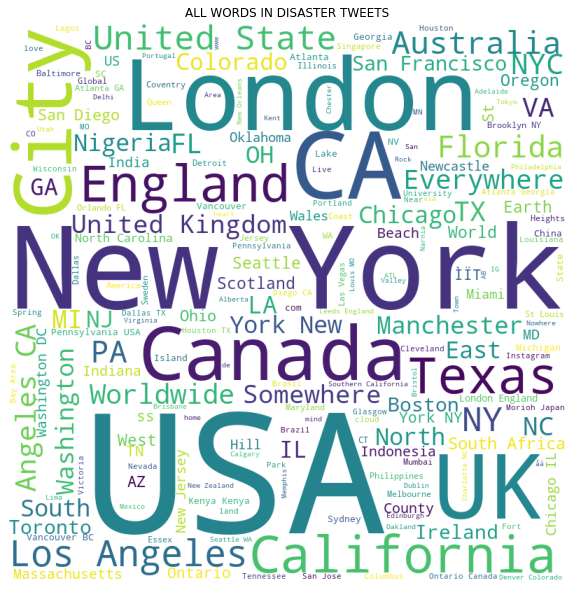

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
punctuation=set(string.punctuation)
stopwords|=punctuation
disaster_tweets=" ".join([i for i in train[train["target"]==0].location.dropna()])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(disaster_tweets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("ALL WORDS IN DISASTER TWEETS")
plt.tight_layout(pad = 0)
 
plt.show()

Observation:
- We see that the maximum tweets for disaster and non disaster is from USA which indicates that majorly the tweets in our database in from the US
- We can also see countries like Canada and Nigeria in disaster tweets

Although this provides an overview of location it cannot completely be trusted as in location there is a mixup between cities and countries thus not providing us with acurate results

**DUPLICATE ENTRIES**

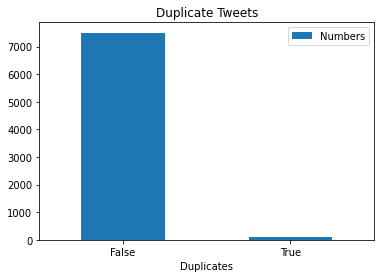

False    7503
True      110
dtype: int64


In [ ]:
q=train.duplicated(subset=["text"])
df = pd.DataFrame({'Duplicates':q.value_counts().index.tolist(), 'Numbers':q.value_counts()})
ax = df.plot.bar(x='Duplicates', y='Numbers', rot=0)
plt.title("Duplicate Tweets")
plt.show()
print(q.value_counts())

Observation:
- We observe that there are some repetation in the tweets.

After the EDA of the train dataset provided to us we can observe that:
- The dataset is imbalanced.
- Features like location and keywords contain Nan value. We cannot remove those features as the it may contain vitial information about the tweets thus we can replace them with None.
- There are also some repetation of same tweets in the database so we shall also have to remove the duplicates
- As these are texts we will have to preprocess all of the inputs and implement word embeddings in it. 
- We can also merge the three columns i.e. location, keyword and texts before inputing it to our model. 

Keeping all this in mind we could proceed with the preprocessing of the data

# MODEL

# **PREPROCESSING**

In [ ]:
test=pd.read_csv("Final_test.csv")

Observation:
- As seen during EDA there were some duplicates so we removed those rows thus decreasing the number of entries

**MERGE**

In [ ]:
final=[]
for index,i in test.iterrows():
  temp=[]
  temp.append(i["location"])
  temp.append(i["keyword"])
  temp.append(i["text"])
  temp=" ".join(temp)
  final.append(temp)
test["final"]=final

We have merged all the three features together into one feature

**Removing Unwanted Texts**

In RoBERTa instead of complete preprocessing we just remove html tags, convert the text into lower case and do spelling check.
As RoBERTa has been trained on huge raw datasets of wikipedia and books we can avoid other preprocessing steps to get the best of results

In [ ]:
from textblob import TextBlob
def preprocessing(text):
  text=text.lower() #lowercase
  text ="".join([re.sub(r'https?://t.co/\w+','',t) for t in text])
  b=TextBlob(text)
  text=b.correct()
  return text

**Tokenization**

As we had observed before, because our data is not too much training an embedding ourselves wont work out well so we shall import word embeddings

In [ ]:
import tensorflow as tf
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification

In [ ]:
model_name = 'roberta-large'
roberta_tokenizer = RobertaTokenizerFast.from_pretrained(model_name)
roberta_seq = TFRobertaForSequenceClassification.from_pretrained(model_name)

# **ONLY TEST**

In [ ]:
def tokenization(test):
        Xtest=[]
    test=test
    for index,i in test.iterrows():
      Xtest.append(str(i["final"]))
    X_test = roberta_tokenizer(Xtest,padding='max_length',max_length=max_len,return_tensors='tf')
    final = tf.data.Dataset.from_tensor_slices(dict(X_test))
    final = final.batch(batch_size)
    return final

In [ ]:
def predict(final):
    outputs_test = roberta_seq.predict(final)
    y_pred = outputs_test[0].argmax(axis=1)

In [ ]:
sub = pd.Series(y_pred,index=test["id"],name='target')
sub.to_csv('new_submission3_3p.csv')